# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: Los Galácticos

- Nombre de alumno 1: Arturo Marín
- Nombre de alumno 2: Martín González


### **Link de repositorio de GitHub:** https://github.com/ArturoMarin9/Laboratorios-MDS7202-1

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
  
  Apache Spark es un framework diseñado para procesar datos a gran escala, este ofrece ventajas en escalabilidad, rendimiento, soporte para múltiples fuentes de datos, capacidad de procesamiento en memoria y en tiempo real. Maneja grandes volúmenes de datos distribuidos en clústeres, ejecutando operaciones en paralelo para un rendimiento más rápido, y proporciona conectores para diversas fuentes de datos. Además, cuenta con módulos para análisis en tiempo real, siendo ideal para aplicaciones que requieren procesamiento instantáneo de datos.

2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.

  Un RDD (Resilient Distributed Dataset) en Apache Spark es una colección distribuida e inmutable de datos. Una de sus principales características es que sus operaciones se aplican de manera funcional a cada partición de datos de forma paralela. En relación con los DataFrames, los RDDs son la capa subyacente en Spark. Los DataFrames son una abstracción más estructurada y optimizada que se construye sobre los RDDs, ofreciendo una interfaz amigable y eficiente para manipular datos estructurados, con optimizaciones de rendimiento y funcionalidades adicionales. Los RDDs, sin embargo, proporcionan flexibilidad y control a un nivel más bajo.

3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?

  Las transformaciones en Spark generan un nuevo DataFrame a partir de uno existente sin modificar el conjunto de datos original, como por ejemplo, `orderBy()` y `join()`. Por otro lado, las acciones desencadenan la ejecución de todas las transformaciones acumuladas, por ejemplo `show()` y `count()`. Al ejecutar acción en Spark, se realizan las operaciones necesarias basadas en las transformaciones acumuladas, como leer datos, aplicar transformaciones y escribir el resultado. Esto se optimiza mediante la evaluación perezosa, que planifica y almacena operaciones sin ejecutarlas de inmediato, permitiendo optimizar el plan de ejecución y mantener un linaje de datos.

4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.

  Al particionar los datos, Spark puede realizar operaciones en paralelo en múltiples nodos, lo que permite un procesamiento más rápido al aprovechar al máximo los recursos del clúster. Además, el particionamiento adecuado puede minimizar el movimiento de datos entre los nodos, lo que reduce la sobrecarga de red y optimiza el rendimiento. También, un buen particionamiento puede minimizar el shuffle de datos durante las operaciones de agrupamiento, lo que resulta en un procesamiento más eficiente.

5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?

  Las funciones del Spark Driver incluyen instanciar la `SparkSession`, comunicarse con el gestor del clúster para solicitar recursos para los ejecutores, y transformar las operaciones definidas en el código en gráficos acíclicos dirigidos (DAGs) para una ejecución eficiente de las tareas.
  Por otro lado, el Spark Executor opera en cada nodo trabajador dentro del clúster, comunicándose directamente con el Spark Driver. Los ejecutores llevan a cabo las tareas asignadas por el conductor en los nodos de trabajo, procesando datos y devolviendo los resultados al conductor.

6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?

  El Catalyst Optimizer en Apache Spark es un componente clave para mejorar el rendimiento de consultas SQL y operaciones en DataFrames. Utiliza reglas de optimización basadas en álgebra relacional y teoría de bases de datos para transformar y optimizar el plan de ejecución de consultas, aplicando técnicas como poda de columnas, fusión de operaciones y selección de algoritmos de join más eficientes. Es adaptable y puede tomar decisiones basadas en estadísticas y características específicas de los datos, lo que permite una optimización personalizada y eficaz.


## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [ ]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=530d1b80d70fd4d8c79f21b77ae6e8777198f14285b6781f0e98a2652739439d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Ahora, iniciamos el SparkContext (versión en Colab):

In [ ]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("Laboratorio_4") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Print the SparkSession
spark

Cargue los datos usando **pyspark**

In [ ]:
import requests

# Download Parquet file
parquet_url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet"
response = requests.get(parquet_url)
with open("datos_lab_spark.parquet", "wb") as file:
    file.write(response.content)

# Load Parquet data from local file
df_parquet = spark.read.parquet("datos_lab_spark.parquet")

# Show schema and first few rows
df_parquet.printSchema()
df_parquet.show(5)


root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+-

In [ ]:
# Download pickle file
pickle_url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false"
response = requests.get(pickle_url)
with open("object.pkl", "wb") as file:
    file.write(response.content)

# Load pickle data from local file
df_pickle = spark.read.format("binaryFile").load("object.pkl")

# Show schema and first few rows
df_pickle.printSchema()
df_pickle.show(5)


root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)

+--------------------+--------------------+------+--------------------+
|                path|    modificationTime|length|             content|
+--------------------+--------------------+------+--------------------+
|file:/content/obj...|2024-04-20 23:40:...|   894|[80 04 95 73 03 0...|
+--------------------+--------------------+------+--------------------+



### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [ ]:
#1.

# Print schema of Parquet data
df_parquet.printSchema()

# Print schema of pickle data
df_pickle.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)



In [ ]:
#2.

# Show first 10 rows of Parquet data
df_parquet.show(10)

# Show first 10 rows of pickle data
df_pickle.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

Al haber solo una fila en el archivo "pickle", no tiene sentido considerarlo para los siguientes pasos. Pues al parecer sería un archivo que utilizaremos para serializar y guardar modelos de Machine Learning.

In [ ]:
#3.

# Sample 5% of Parquet data
sample_parquet = df_parquet.sample(fraction=0.05, withReplacement=False, seed=42)
sample_parquet.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|  Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|                NULL|                NULL|            254.48|2018-11-07 00:00:00| bank transfer|     electronics|    NULL|        NULL|  West Melissashire|    desktop|   52.160.5.1

In [ ]:
# 4.

# Get data types of each column
column_types_parquet = [(col, dtype) for col, dtype in df_parquet.dtypes]
print(column_types_parquet)

[('Transaction ID', 'string'), ('Customer ID', 'string'), ('Transaction Amount', 'double'), ('Transaction Date', 'timestamp_ntz'), ('Payment Method', 'string'), ('Product Category', 'string'), ('Quantity', 'double'), ('Customer Age', 'double'), ('Customer Location', 'string'), ('Device Used', 'string'), ('IP Address', 'string'), ('Shipping Address', 'string'), ('Billing Address', 'string'), ('Is An Alien', 'double'), ('Account Age Days', 'double'), ('Transaction Hour', 'double')]


Las columnas con un tipo de dato incorrecto serían:
- Transaction Date: Dicha variable tiene un tipo de dato "timestamp_ntz", lo cual no es directamente incorrecto, pero al observar los valores almacenados en esta, pareciera que la parte asociada a la hora sobra, por lo cual sería más correcto utilizar un formato de fecha más simple, como "date".
- Quantity: Al igual que en el caso anterior, su tipo de dato ("double") no es necesariamente incorrecto, pero al tratarse de cantidades enteras, sería más apropiado utilizar un formato "integer".
- Customer Age: Al igual que en el caso anterior, dicha variable tiene un tipo de dato "double", pero sería más correcto que fuera del tipo "integer".
- Is An Alien: Dicha variable está registrada con el tipo "double", lo cual no es correcto, pues se trata de una variable binaria, y dada su definición debiera representarse con el tipo "boolean".

In [ ]:
# 5.

from pyspark.sql.functions import to_date
from pyspark.sql.types import IntegerType, BooleanType

# Adjust datatypes of columns
df_parquet = df_parquet.withColumn("Transaction Date", to_date("Transaction Date"))  # Change to date datatype
df_parquet = df_parquet.withColumn("Quantity", df_parquet["Quantity"].cast(IntegerType()))  # Change to integer datatype
df_parquet = df_parquet.withColumn("Customer Age", df_parquet["Customer Age"].cast(IntegerType()))  # Change to integer datatype
df_parquet = df_parquet.withColumn("Is An Alien", df_parquet["Is An Alien"].cast(BooleanType()))  # Change to boolean datatype

# Check the updated schema
df_parquet.printSchema()
df_parquet.show()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: date (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: boolean (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------

Vemos que ahora todas las columnas están con el tipo de dato correcto, continuemos.

In [ ]:
#6.

from pyspark.sql.functions import count, when, isnull

# Count null values for each column
null_counts = df_parquet.select([count(when(isnull(c), c)).alias(c) for c in df_parquet.columns])
null_counts.show()


+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [ ]:
# 7.

# Delete rows with missing values
df_parquet_cleaned = df_parquet.dropna()

# Show the count of rows after removing missing values
print("Number of rows after removing missing values:", df_parquet_cleaned.count())

Number of rows after removing missing values: 13388


In [ ]:
# 8.

# Delete duplicated rows
df_parquet_cleaned = df_parquet_cleaned.dropDuplicates()

# Show the count of rows after removing duplicates
print("Number of rows after removing duplicates:", df_parquet_cleaned.count())

Number of rows after removing duplicates: 13388


### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [ ]:
# 1.

from pyspark.sql.functions import col, log

# Add new column "Transaction bp" with computed values
df_parquet_cleaned = df_parquet_cleaned.withColumn("Transaction bp", log(48 + col("Transaction Amount") ** 36))

# Show the DataFrame with the new column
df_parquet_cleaned.show()

# Ojo que en nuestro caso estamos usamos logaritmo natural!

+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+--------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|      Transaction ID|         Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|   Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|
+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+--------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|1d510ac5-c2ab-47d...|81d9210e-ada2-4a8...|            210.73|      2020-05-09|   credit card|    toys & games|       1|          23|

In [ ]:
#2.

from pyspark.sql.functions import month

# Add new column "Transaction Month" with month of transaction
df_parquet_cleaned = df_parquet_cleaned.withColumn("Transaction Month", month("Transaction Date"))

# Show the DataFrame with the new column
df_parquet_cleaned.show()

+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+--------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|      Transaction ID|         Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|   Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|
+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+--------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|1d510ac5-c2ab-47d...|81d9210e-ada2-4a8...|            210.73|      2020-05-09|

In [ ]:
# 3.

from pyspark.sql.functions import when

# Add new column "Type of Purchase" based on quantity sold
df_parquet_cleaned = df_parquet_cleaned.withColumn("Type of Purchase",
                            when(col("Quantity") <= 5, "Compra minorista")
                            .otherwise("Compra mayorista"))

# Show the DataFrame with the new column
df_parquet_cleaned.show()


+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+--------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|   Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of Purchase|
+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+--------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|1d510ac5-c2ab-47d...|81d921

In [ ]:
#4.

# Filter DataFrame to show only rows where Is Fraudulent is True and Type of Purchase is "Compra mayorista"
df_alien_mayorista = df_parquet_cleaned.filter((col("Is An Alien") == True) & (col("Type of Purchase") == "Compra mayorista"))

# Show the filtered DataFrame
df_alien_mayorista.show()


+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of Purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+---------------

In [ ]:
#5.

# Filter DataFrame to separate "True" and "False" values
df_true = df_parquet_cleaned.filter(col("Is An Alien") == True)
df_false = df_parquet_cleaned.filter(col("Is An Alien") == False)

# Group by "Is An Alien" column and count the rows for each group
true_counts = df_true.groupBy("Is An Alien").count()
false_counts = df_false.groupBy("Is An Alien").count()

# Show the counts
print("Compras realizadas por Aliens:")
true_counts.show()

print("Compras realizadas por humanos:")
false_counts.show()


Compras realizadas por Aliens:
+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|       true|  688|
+-----------+-----+

Compras realizadas por humanos:
+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|      false|12700|
+-----------+-----+



In [ ]:
#6.

from pyspark.sql.functions import avg

# Calculate average revenue per transaction for each payment method and group
revenue_per_payment_method = df_parquet_cleaned.groupBy("Payment Method") \
    .pivot("Is An Alien", [True, False]) \
    .agg(avg("Transaction Amount").alias("Average Revenue per Transaction")) \
    .withColumnRenamed("True", "Alienígenas") \
    .withColumnRenamed("False", "Humanos")

# Show the table
revenue_per_payment_method.show()

+--------------+------------------+------------------+
|Payment Method|       Alienígenas|           Humanos|
+--------------+------------------+------------------+
|    debit card| 547.1965168539326|215.21641883519203|
| bank transfer| 547.6004624277457|215.15149230285914|
|        PayPal|469.51776470588237| 215.1259858475394|
|   credit card| 517.7530538922158|206.31122327044045|
+--------------+------------------+------------------+



### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [ ]:
# Get data types of each column
column_types_parquet_2 = [(col, dtype) for col, dtype in df_parquet_cleaned.dtypes]
print(column_types_parquet_2)

[('Transaction ID', 'string'), ('Customer ID', 'string'), ('Transaction Amount', 'double'), ('Transaction Date', 'date'), ('Payment Method', 'string'), ('Product Category', 'string'), ('Quantity', 'int'), ('Customer Age', 'int'), ('Customer Location', 'string'), ('Device Used', 'string'), ('IP Address', 'string'), ('Shipping Address', 'string'), ('Billing Address', 'string'), ('Is An Alien', 'boolean'), ('Account Age Days', 'double'), ('Transaction Hour', 'double'), ('Transaction bp', 'double'), ('Transaction Month', 'int'), ('Type of Purchase', 'string')]


In [ ]:
# Convert DataFrame to Pandas
df_pd = df_parquet_cleaned.toPandas()

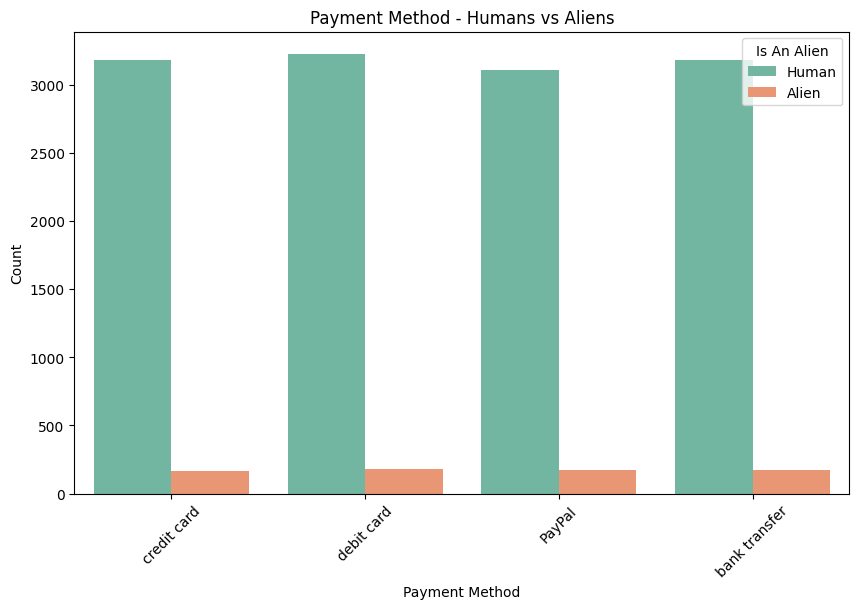

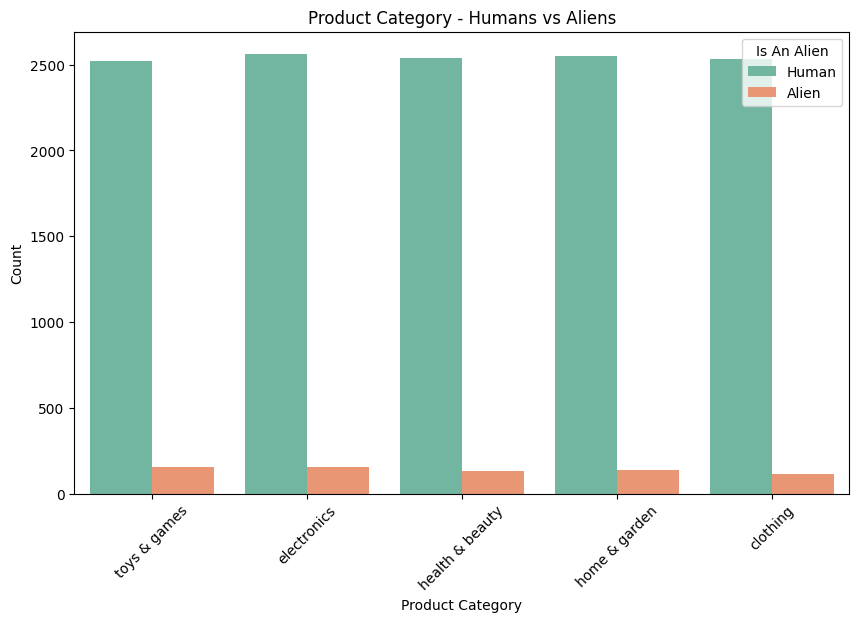

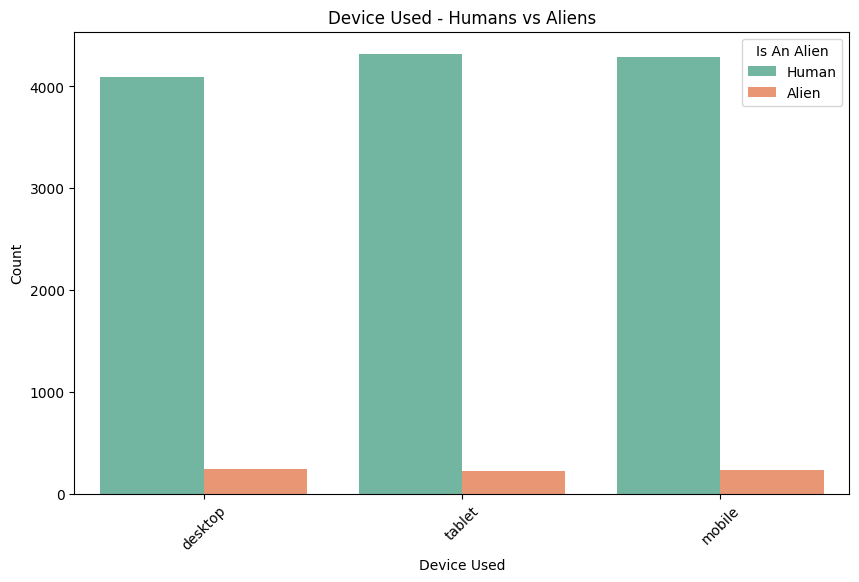

In [ ]:
# Opción 1: Usando todos los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Payment Method for humans and aliens
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pd, x="Payment Method", hue="Is An Alien", palette="Set2")
plt.title("Payment Method - Humans vs Aliens")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is An Alien", labels=["Human", "Alien"])
plt.show()

# Plot Product Category for humans and aliens
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pd, x="Product Category", hue="Is An Alien", palette="Set2")
plt.title("Product Category - Humans vs Aliens")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is An Alien", labels=["Human", "Alien"])
plt.show()

# Plot Device Used for humans and aliens
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pd, x="Device Used", hue="Is An Alien", palette="Set2")
plt.title("Device Used - Humans vs Aliens")
plt.xlabel("Device Used")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is An Alien", labels=["Human", "Alien"])
plt.show()


Number of rows associated with humans: 688
Number of rows associated with aliens: 688


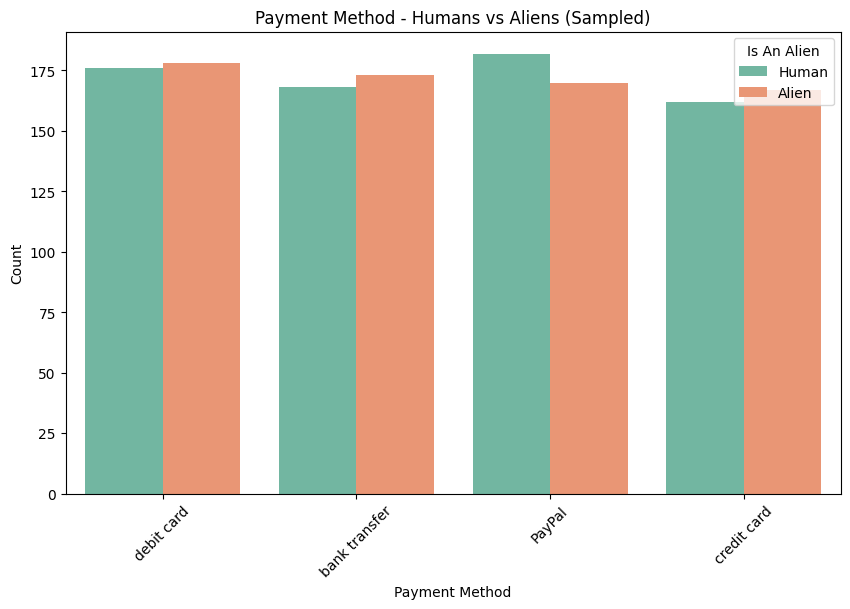

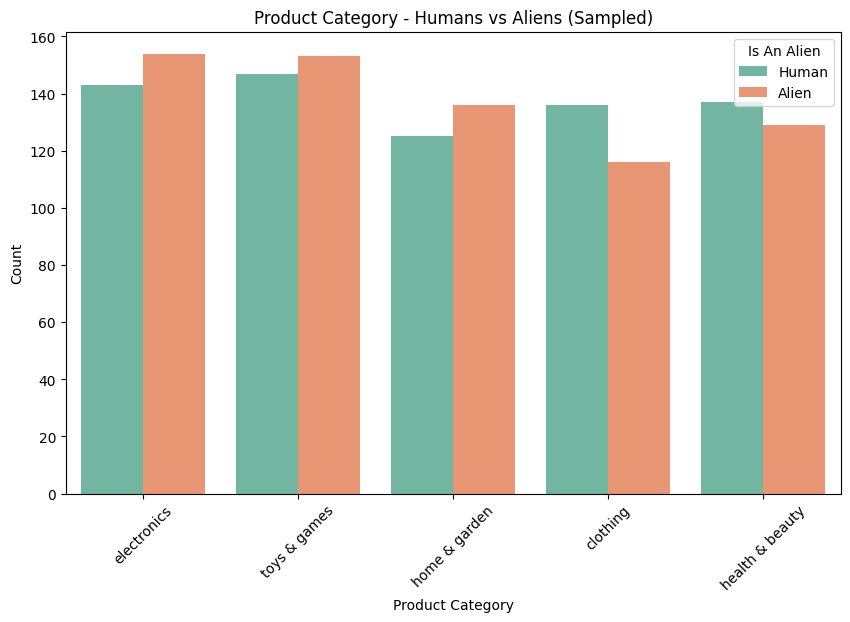

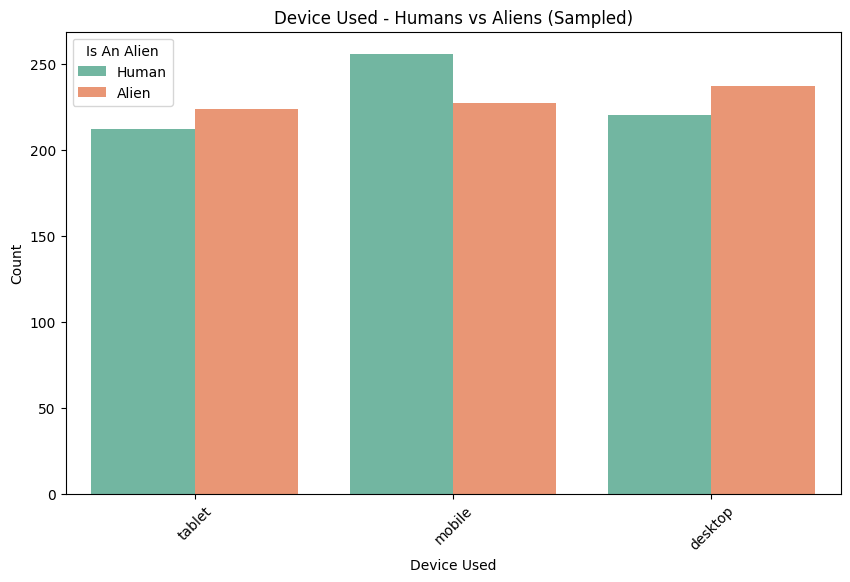

In [ ]:
# Opción 2: Utilizando una muestra aleatoria del 5.42% de los datos relacionados a humanos (para así tener la misma cantidad de datos para ambos grupos y poder comparar comportamiento de mejor manera)

# Separate data for aliens and humans
df_aliens = df_pd[df_pd["Is An Alien"] == True]
df_humans = df_pd[df_pd["Is An Alien"] == False]

# Random sampling of 5.42% of human data
df_humans_sampled = df_humans.sample(frac=0.0542, random_state=42)

# Concatenate data for aliens and sampled humans
df_pd_2 = pd.concat([df_aliens, df_humans_sampled])

# Count the number of rows associated with humans and aliens in df_pd_2
humans_count = df_pd_2[df_pd_2["Is An Alien"] == False].shape[0]
aliens_count = df_pd_2[df_pd_2["Is An Alien"] == True].shape[0]

# Print the counts
print("Number of rows associated with humans:", humans_count)
print("Number of rows associated with aliens:", aliens_count)

# Plot Payment Method for humans and aliens
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pd_2, x="Payment Method", hue="Is An Alien", palette="Set2")
plt.title("Payment Method - Humans vs Aliens (Sampled)")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is An Alien", labels=["Human", "Alien"])
plt.show()

# Plot Product Category for humans and aliens
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pd_2, x="Product Category", hue="Is An Alien", palette="Set2")
plt.title("Product Category - Humans vs Aliens (Sampled)")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is An Alien", labels=["Human", "Alien"])
plt.show()

# Plot Device Used for humans and aliens
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pd_2, x="Device Used", hue="Is An Alien", palette="Set2")
plt.title("Device Used - Humans vs Aliens (Sampled)")
plt.xlabel("Device Used")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is An Alien", labels=["Human", "Alien"])
plt.show()

Se añaden dos versiones de gráficos para esta sseción. A nivel general se tiene un desbalanceo de los datos para la variable categórica que detalla si es alien o no "Is An Alien", es por esto que en cada gráfico mostrado se observa una mayor cantidad metodos de pagos, categoría de producto, y dispositivo usado, por cada categoria de esta variables, esto cuando se trabaja con todos los datos.

Ahora si se balancean los datos utilizando una selección aletoria del 5.42% de los datos relacionados a humanos, se obtienen las siguientes observaciones:

**Payment Method - Humans vs Aliens (Sampled):** La mayoría de los humanos paga a través de Paypal, pero aún así no se puede habalar de una tendencia clara. En el caso de los Aliens, la mayoría cancela con Debit Card.

**Product Category - Humans vs Aliens (Sampled):** Los humanos en su mayoría compran podructos electronicos o juguetes. al igual que en el caso de los Aliens.

**Device Used - Humans vs Aliens (Sampled):** En este caso, los Humanos utilizzan en su mayoría dispotivo mobile, pero si se ve el graficos con todos los datos, se observa que predomina la categoria tablet. En el caso de los Aliens, predomina la categoría desktop.

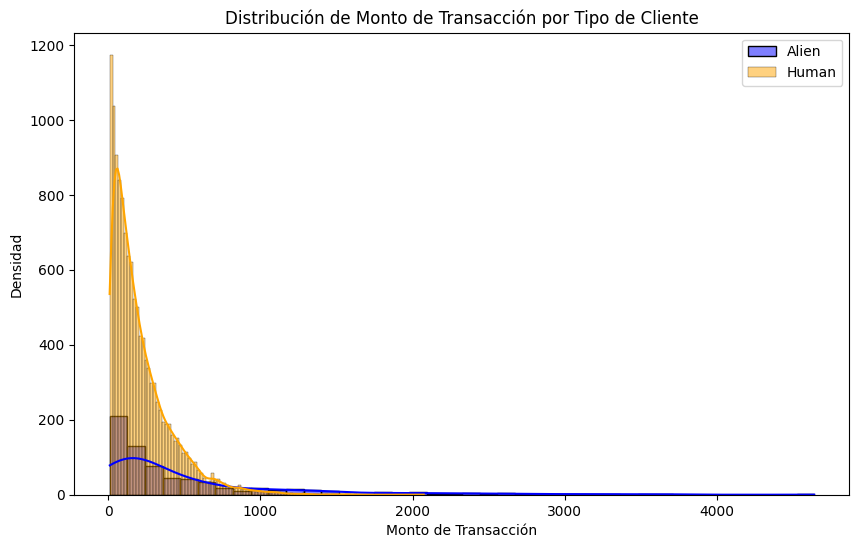

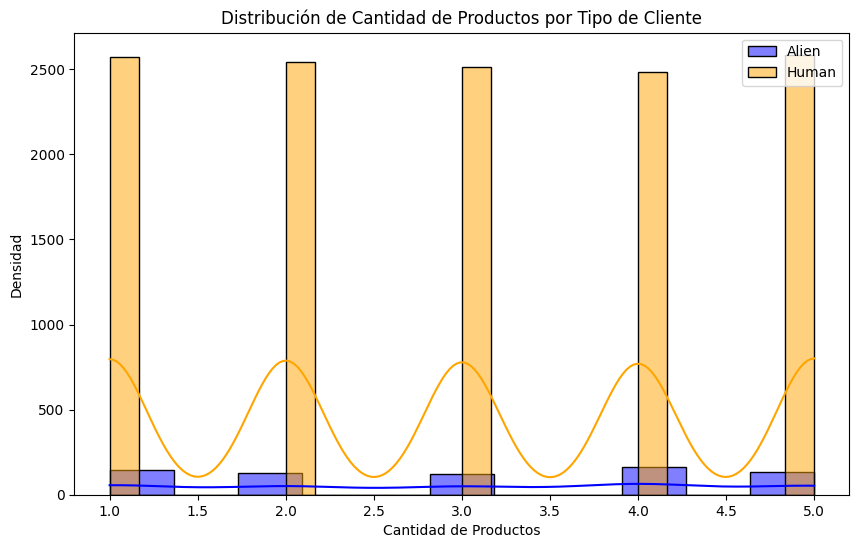

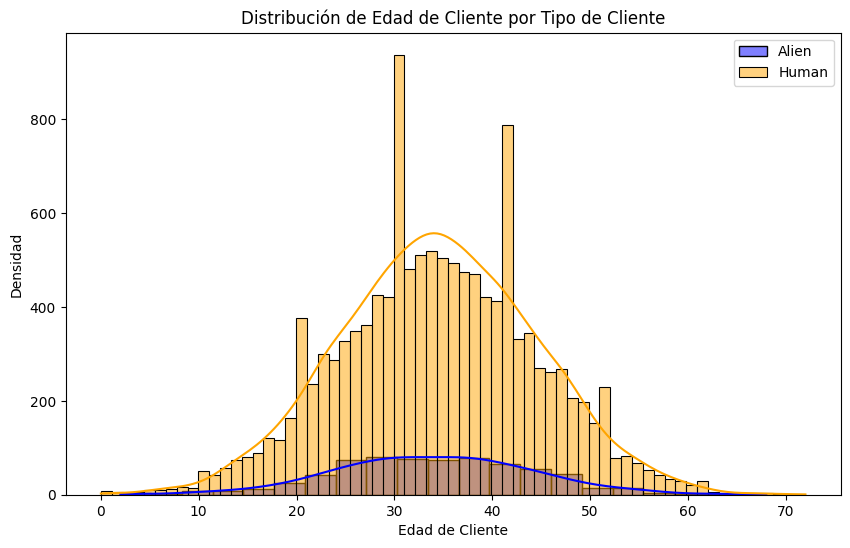

In [ ]:
# 2. Visualización de Variables Numéricas
# Distplot para la variable 'Transaction Amount'
plt.figure(figsize=(10, 6))
sns.histplot(df_pd[df_pd['Is An Alien'] == True]['Transaction Amount'], kde=True, label='Alien', color='blue')
sns.histplot(df_pd[df_pd['Is An Alien'] == False]['Transaction Amount'], kde=True, label='Human', color='orange')
plt.title('Distribución de Monto de Transacción por Tipo de Cliente')
plt.xlabel('Monto de Transacción')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Distplot para la variable 'Quantity'
plt.figure(figsize=(10, 6))
sns.histplot(df_pd[df_pd['Is An Alien'] == True]['Quantity'], kde=True, label='Alien', color='blue')
sns.histplot(df_pd[df_pd['Is An Alien'] == False]['Quantity'], kde=True, label='Human', color='orange')
plt.title('Distribución de Cantidad de Productos por Tipo de Cliente')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Distplot para la variable 'Customer Age'
plt.figure(figsize=(10, 6))
sns.histplot(df_pd[df_pd['Is An Alien'] == True]['Customer Age'], kde=True, label='Alien', color='blue')
sns.histplot(df_pd[df_pd['Is An Alien'] == False]['Customer Age'], kde=True, label='Human', color='orange')
plt.title('Distribución de Edad de Cliente por Tipo de Cliente')
plt.xlabel('Edad de Cliente')
plt.ylabel('Densidad')
plt.legend()
plt.show()


De los gráficos se tiene que:

**Distribución de Monto de Transacción por Tipo de Cliente:** En este gráfico, se observa una mayor concentración, para ambas categorías, alien y humano, en los valores menores, principalmente entre 0 y 1000, pero inclinado al sector izquierdo. Esto sugiere que la mayoría de las transacciones tienen montos más bajos, independientemente de si el cliente es un humano o un alien.

**Distribución de Cantidad de Productos por Tipo de Cliente:** No se observa una tendencia clara en este gráfico, ya que para cada categoría, alien y humano, se observa más o menos la misma cantidad de clientes que tienen una determinada cantidad de productos. Esto indica que tanto los humanos como los aliens realizan transacciones que implican una variedad similar de productos.

**Distribución de Edad de Cliente por Tipo de Cliente:** Se observa que para ambas categorías, alien y humano, se tiene una distribución que se podría pensar que es normal, existiendo algunos picos para el caso de los humanos, específicamente alrededor de los 30 años y alrededor de los 41 años aproximadamente. Esto sugiere que para los humanos, hay ciertas cohortes de edad que podrían ser más representativas o significativas en términos de participación en las transacciones. Por otro lado, la distribución de edad para los aliens parece ser más uniforme, con menos fluctuaciones pronunciadas en comparación con los humanos. Esto podría indicar que la edad de los aliens no influye tanto en sus patrones de transacción como lo hace para los humanos, lo que podría sugerir diferencias en el comportamiento de compra entre estas dos categorías de clientes.

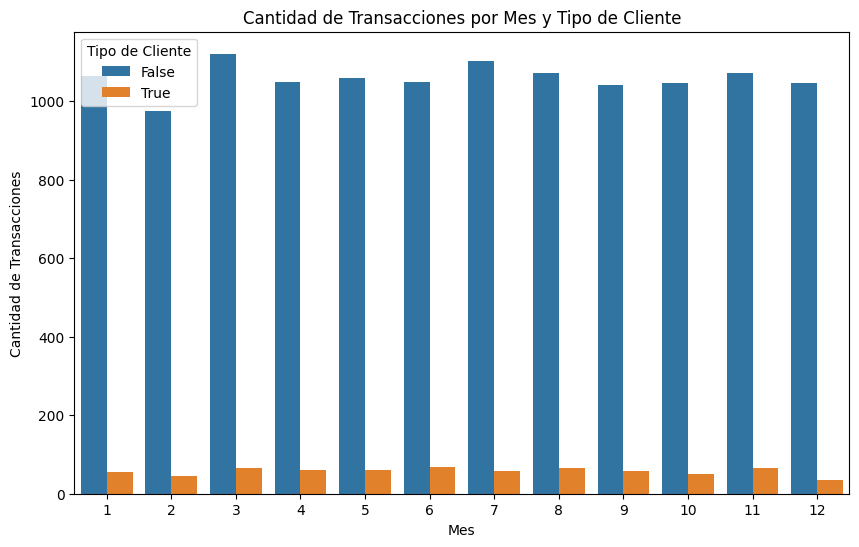

<ipython-input-51-ee7cd314d151>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pd, x='Transaction Month', y='Transaction Amount', hue='Product Category', estimator=sum, ci=None)


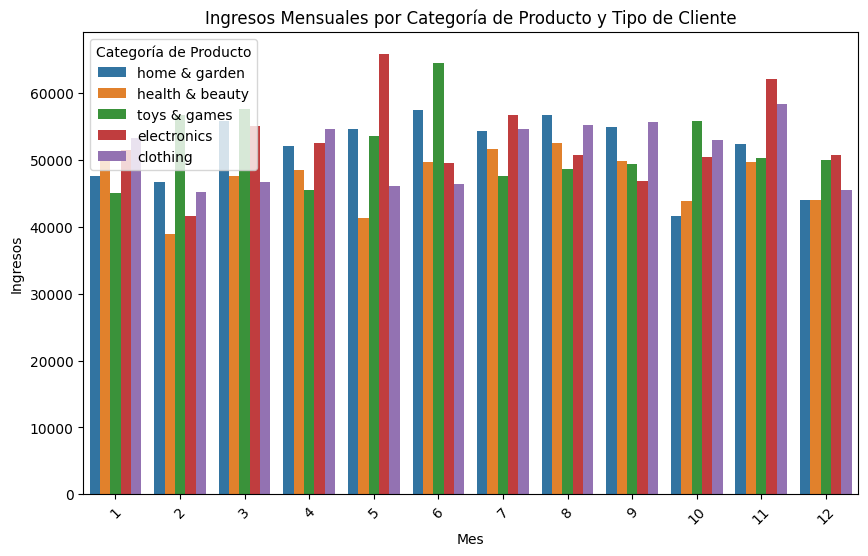

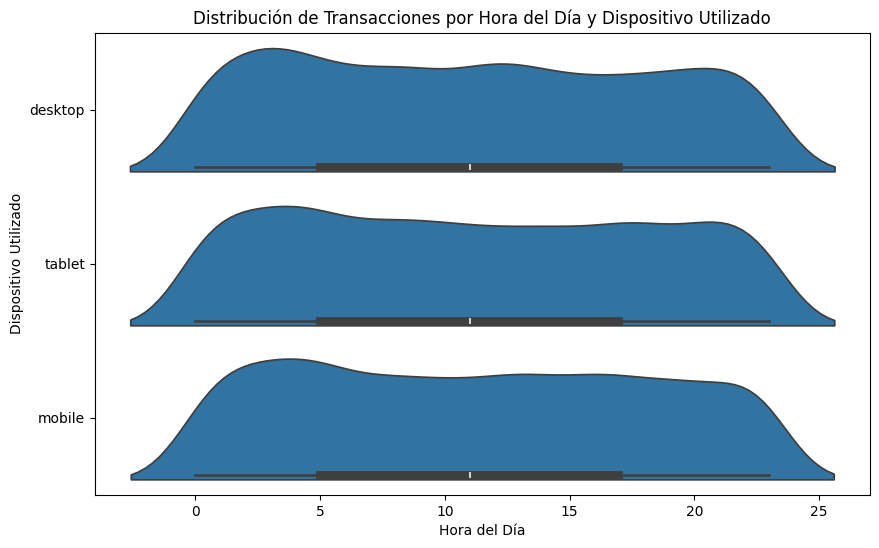

In [ ]:
# Gráfico 1: Cantidad de Transacciones por Mes y Tipo de Cliente
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pd, x='Transaction Month', hue='Is An Alien')
plt.title('Cantidad de Transacciones por Mes y Tipo de Cliente')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Tipo de Cliente')
plt.show()


# Gráfico 2: Ingresos Mensuales por Categoría de Producto y Tipo de Cliente
plt.figure(figsize=(10, 6))
sns.barplot(data=df_pd, x='Transaction Month', y='Transaction Amount', hue='Product Category', estimator=sum, ci=None)
plt.title('Ingresos Mensuales por Categoría de Producto y Tipo de Cliente')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.legend(title='Categoría de Producto')
plt.show()

# Gráfico 3: Distribución de Transacciones por Hora del Día y Dispositivo Utilizado
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_pd, x='Transaction Hour', y='Device Used', split=True)
plt.title('Distribución de Transacciones por Hora del Día y Dispositivo Utilizado')
plt.xlabel('Hora del Día')
plt.ylabel('Dispositivo Utilizado')
plt.show()


 De cada grafico se tiene que.

 **Cantidad de Transacciones por Mes y Tipo de Cliente:** En este gráfico, podemos observar que no hay un mes particular que sobresalga significativamente sobre los demás en términos de cantidad de transacciones. Sin embargo, para los clientes humanos (False), los meses 3 y 7 muestran una ligera tendencia hacia un mayor número de transacciones. En contraste, para los clientes alienígenas (True), la cantidad de transacciones parece ser más uniforme de mes a mes, sin destacar un patrón específico.

**Ingresos Mensuales por Categoría de Producto y Tipo de Cliente:** Se pueden identificar algunos picos en ciertas categorías de productos durante ciertos meses. Por ejemplo, en la categoría de electrónicos, se observa un aumento notable en los ingresos durante el mes 5, mientras que en la categoría de juguetes y juegos, hay un pico en el mes 6. Estos picos podrían estar relacionados con eventos estacionales, promociones especiales o tendencias de compra específicas.

**Distribución de Transacciones por Hora del Día y Dispositivo Utilizado:** Este gráfico revela un comportamiento consistente entre los diferentes dispositivos utilizados para realizar transacciones. Se observa que la mayoría de las transacciones ocurren en las horas extremas del día, ya sea al inicio del día o al final del mismo. Este patrón sugiere que los clientes tienden a realizar transacciones en momentos específicos del día, independientemente del dispositivo que utilicen para acceder a la plataforma de compras.

### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



Para desarrollar esto utilizaremos el dataframe llamado "df_parquet_cleaned"

In [ ]:
# 1. Creación de Tabla con PySpark

# 2. Seleccionar la variable de partición
partition_column = 'Product Category'

# 3. Crear la tabla particionada
df_parquet_cleaned.write.partitionBy(partition_column).saveAsTable('tabla_transacciones')

# # Mostrar la tabla creada
# spark.sql("SHOW TABLES").show()


La elección de Product Category como la variable de partición para la tabla se justifica por varios motivos fundamentales. En primer lugar, la partición por categoría de producto permite una organización eficiente de los datos en la tabla, ya que agrupa las transacciones relacionadas con cada categoría en particiones separadas. Esto facilita el acceso a los datos específicos de cada categoría durante la ejecución de consultas, lo que puede mejorar significativamente el rendimiento de las operaciones de lectura y consulta. Además, dado que las consultas suelen estar centradas en análisis de productos específicos o comparaciones entre diferentes categorías, la partición por Product Category ayuda a reducir el escaneo innecesario de datos y a minimizar el procesamiento redundante, lo que conduce a tiempos de respuesta más rápidos. Además, al distribuir uniformemente los datos entre las particiones de acuerdo con las categorías de productos, se promueve un equilibrio en la carga de trabajo en el clúster de Spark, lo que contribuye a una utilización más eficiente de los recursos y a un rendimiento general mejorado del sistema. En resumen, la partición por Product Category optimiza tanto el almacenamiento como el acceso a los datos, al tiempo que mejora la eficiencia y la escalabilidad de las consultas en el entorno de PySpark.

In [ ]:
# 2. Consulta SQL para Principales Clientes
spark.sql("""
    SELECT
        `Customer ID`,
        COUNT(*) AS total_productos_comprados
    FROM
        tabla_transacciones
    GROUP BY
        `Customer ID`
    ORDER BY
        total_productos_comprados DESC
    LIMIT 10
""").show()

+--------------------+-------------------------+
|         Customer ID|total_productos_comprados|
+--------------------+-------------------------+
|99909c0c-1648-44a...|                        1|
|9807fdaf-7db1-49b...|                        1|
|116bdbd3-2bba-4f7...|                        1|
|7a26e73a-ab50-469...|                        1|
|2facdc30-befb-469...|                        1|
|0891ea70-f73c-40b...|                        1|
|ebf10b43-2999-4fa...|                        1|
|ddb1eedb-78a7-403...|                        1|
|10eae4ca-8a7e-4e5...|                        1|
|9485a24c-2b5d-42a...|                        1|
+--------------------+-------------------------+



In [ ]:
# Consulta SQL para calcular la compra más alta por cada usuario en los últimos tres meses
spark.sql("""
    SELECT
        `Customer ID`,
        MAX(`Transaction Amount`) AS max_compra_ultimos_tres_meses
    FROM (
        SELECT
            *,
            MAX(`Transaction Date`) OVER (PARTITION BY `Customer ID`) AS max_fecha,
            DATE_SUB(MAX(`Transaction Date`) OVER (PARTITION BY `Customer ID`), 90) AS fecha_tres_meses_atras
        FROM tabla_transacciones
    ) AS subconsulta
    WHERE `Transaction Date` >= fecha_tres_meses_atras
    AND `Transaction Date` <= max_fecha
    GROUP BY `Customer ID`
""").show()

+--------------------+-----------------------------+
|         Customer ID|max_compra_ultimos_tres_meses|
+--------------------+-----------------------------+
|0005f674-821d-4c4...|                       107.11|
|000695ce-4310-416...|                       689.58|
|0010bfa7-d3b5-442...|                       130.74|
|001341a1-ce95-4f6...|                       222.59|
|0013653b-9ed4-4fa...|                       749.29|
|0027a40f-9d45-422...|                        84.59|
|0028d9e7-55bf-4e6...|                       221.28|
|002a2b79-e86c-478...|                       331.93|
|0034597d-5db9-4ef...|                       221.23|
|0035807b-8ab5-4f8...|                       175.59|
|0037cc7b-fb0b-433...|                       132.98|
|003b44c7-7a97-47d...|                        82.02|
|003bddcf-270a-474...|                       289.59|
|004d6df5-5d37-4cd...|                        32.36|
|004de8d7-e274-4f3...|                        74.56|
|005599ec-2770-498...|                        

Para realizar una función equivalente a la consulta SQL que calcula la compra más alta realizada por cada usuario en los últimos tres meses, podemos seguir los siguientes pasos:

**Definir una ventana:** Utilizamos la clase Window del módulo pyspark.sql.window para definir la ventana. La ventana debe particionarse por el Customer ID y ordenarse por la fecha de transacción (Transaction Date). Además, debemos especificar el rango de la ventana, que en este caso será los últimos tres meses.

**Calcular la compra más alta por ventana:** Utilizamos la función de agregación max() junto con la función over() para aplicar la ventana definida y calcular la compra más alta realizada por cada usuario en el rango de la ventana.

**Filtrar las transacciones por fecha:** Utilizamos funciones de PySpark para filtrar las transacciones que ocurrieron en los últimos tres meses.

**Seleccionar las columnas de interés:** Seleccionamos las columnas Customer ID y la compra más alta realizada en los últimos tres meses para cada usuario.

**Mostrar los resultados:** Utilizamos la función show() para mostrar los resultados.

### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [ ]:
import pickle

# Paso 1: Cargar el objeto serializado
with open('object.pkl', 'rb') as f:
    objeto_serializado = pickle.load(f)

# Revisar el tipo de objeto
print(type(objeto_serializado))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
# Paso 2: Explorar el objeto
print(dir(objeto_serializado))
help(objeto_serializado)

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params',

El método que predice la probabilidad es "predict_proba".

In [ ]:
# Paso 3: Crear una funcion personalizada

def custom_function(transaction_amount, quantity, customer_age, transaction_hour):
    # Aquí debes utilizar el objeto_serializado para hacer las predicciones
    # Asumiendo que objeto_serializado es un modelo de regresión logística de sklearn
    # Ejemplo de cómo podrías hacer la predicción (la lógica real puede variar dependiendo del modelo):
    features = [[transaction_amount, quantity, customer_age, transaction_hour]]
    prediction = objeto_serializado.predict_proba(features)[:, 1]  # Probabilidad de clase positiva
    return float(prediction)


In [ ]:
# Paso 4: Definir la función UDF

from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Definir la UDF
udf_custom_function = udf(custom_function, FloatType())


In [ ]:
# Paso 5: Generar Nueva columna

# Aplicar la UDF a las columnas relevantes y crear una nueva columna para las predicciones
df_with_predictions = df_parquet_cleaned.withColumn('fraud_probability', udf_custom_function('Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour'))


Para mostrar los cambios:

In [ ]:
# Antes de aplicar la UDF
print("Esquema antes de aplicar la UDF:")
df_parquet_cleaned.printSchema()

# Aplicar la UDF a las columnas relevantes y crear una nueva columna para las predicciones
df_with_predictions = df_parquet_cleaned.withColumn('fraud_probability', udf_custom_function('Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour'))

# Después de aplicar la UDF
print("Esquema después de aplicar la UDF:")
df_with_predictions.printSchema()

Esquema antes de aplicar la UDF:
root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: date (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: boolean (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)
 |-- Transaction bp: double (nullable = true)
 |-- Transaction Month: integer (nullable = true)
 |-- Type of Purchase: string (nullable = false)

Esquema después de aplicar la UDF:
root
 |-- Transaction ID: string (nullable = tr

Los beneficios que se podrían generar al utilizar UDF en Spark son:

**Capacidad de procesamiento distribuido:** Las UDF permiten aprovechar el entorno distribuido de Spark al aplicar la función a través de todas las particiones de datos de manera eficiente.

**Flexibilidad en la manipulación de datos:** Las UDF permiten aplicar cualquier función de Python personalizada a los datos en un DataFrame de Spark, lo que brinda una mayor flexibilidad en la manipulación y transformación de datos.

**Integración con bibliotecas y modelos existentes:** Si tienes modelos o funciones personalizadas desarrolladas en Python, puedes integrarlas fácilmente en tu flujo de trabajo de Spark utilizando UDF.

**Optimización de rendimiento:** Aunque las UDF pueden ser menos eficientes que las funciones internas de Spark, aún ofrecen un buen rendimiento y son útiles cuando se requiere funcionalidad personalizada que no está disponible en las funciones integradas de Spark.